In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

TOP_N = 20

# Convert .csv dataset to DataFrame
data = pd.read_csv("Twitch_game_data.csv", sep=',')

# Clean data
    # Remove missing values
data.dropna(inplace=True)

    # Remove " hours" from Hours_Streamed column
    # Convert Hours_Streamed column to int
data["Hours_Streamed"] = data["Hours_Streamed"].map(lambda x : x.rstrip(" hours"))
data["Hours_Streamed"] = pd.to_numeric(data["Hours_Streamed"])

    # Replace Unicode characters
print(data["Game"].str.extract(r'(<.*>)', expand=False).unique())
'''
<U+00E9> - e
<U+00DB> - U
<U+2212> - -
<U+72FC> - 狼
<U+4EBA> - 人
<U+6BBA> - 殺
<U+014C> - O
<U+016B> - u
'''
data["Game"] = data["Game"].str.replace(r'<U\+00E9>','e', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+00DB>','U', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+2212>','-', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+72FC>','狼', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+4EBA>','人', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+6BBA>','殺', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+014C>','O', regex=True)
data["Game"] = data["Game"].str.replace(r'<U\+016B>','u', regex=True)

    # Remove ranks past TOP_N
data = data.loc[data['Rank'] <= TOP_N]

print("Number of Unique Games: ", data["Game"].unique().size)
data.head()

[nan '<U+00E9>' '<U+00DB>' '<U+2212>' '<U+72FC><U+4EBA><U+6BBA>'
 '<U+014C>' '<U+016B>']
Number of Unique Games:  157


,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


<Figure size 432x288 with 0 Axes>

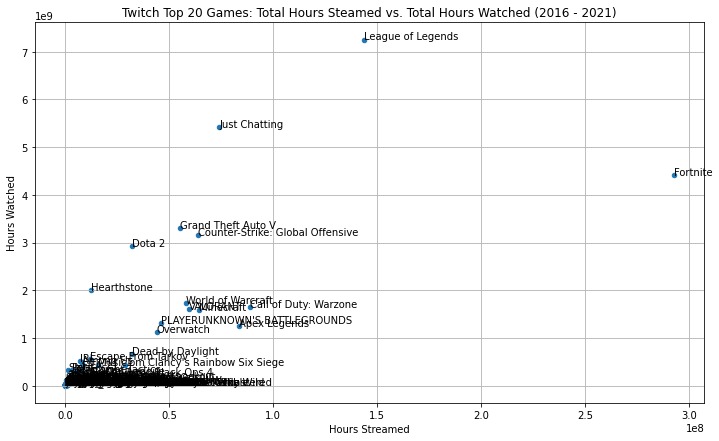

In [18]:
top_games = data['Game'].unique()
years = data['Year'].unique()
months = data['Month'].unique()

# for game in top_games:
#     game_df = data[(data['Game'] == game)]

#     game_hours_watched = game_df['Hours_watched'].sum()
#     game_hours_streamed = game_df['Hours_Streamed'].sum()

#     print(game_hours_watched)
#     print(game_hours_streamed)


game_total_hours_df = data[['Game', 'Hours_watched', 'Hours_Streamed']]
game_total_hours_df = game_total_hours_df.groupby(['Game']).sum()

plt.figure(1)

plot = game_total_hours_df.plot.scatter(
        x='Hours_Streamed',
        y='Hours_watched',
        figsize=(12,7), 
        grid=True,
        title='Twitch Top 20 Games: Total Hours Steamed vs. Total Hours Watched (2016 - 2021)',
        xlabel="Hours Streamed",
        ylabel="Hours Watched"
    )

for game, pt in game_total_hours_df.iterrows():
        plot.annotate(game, (pt.at['Hours_Streamed'], pt.at['Hours_watched']))
    